In [1]:
# importando as bibliotecas
import pandas as pd
import plotly.express as px

In [2]:
excel_file = pd.ExcelFile("C:/Users/odair.colares/Documents/AnalistaDeDados/mes_.xlsx")
df = pd.read_excel(excel_file, sheet_name='mes')
# Renomeando Linhas
df['Turno'] = df['Turno'].str.replace('1Âº Turno', '1º_Turno')
df['Turno'] = df['Turno'].str.replace('Fora de', 'Fora de turno')
df['Turno'] = df['Turno'].str.replace('2Âº Turno', '2º Turno')
df['Lider'] = df['Lider'].str.replace('filipe carvalho fonseca', 'Filipe Fonseca')
df['Lider'] = df['Lider'].str.replace('elaine mendes', 'Elaine Mendes')
df['Lider'] = df['Lider'].str.replace('kaisa carvalho lima', 'Kaisa Lima')
df['Justificativa'] = df['Justificativa'].str.replace('Em anÃ¡lise', 'Em_análise')
df['Justificativa'] = df['Justificativa'].str.replace('em anÃ¡lise', 'Em_análise')
df.head(3)

,Linha,Turno,Lider,Data,Semana,Mes,Modelo,Horas Disponiveis,Minutos Disponiveis,Hota Inicio,Hota FIm,Hora Parada,Minutos Parados,Tempo Parado %,Usuario Reparo,Status,Problema,Causa,Justificativa
0,TT LINHA 08,1º_Turno,Haniel Nascimento Moura,2021-08-02 07:21:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00,2021-08-12 15:56:00,1900-01-13 08:56:00,19256,0.3785,Thiago Freitas de Morais,Finalizado,83 - PROBLEMA DE COMUNICAÃ‡ÃƒO ENTRE APP E SIS...,126 - ANALISE DA ENGENHARIA,NaN
1,TT LINHA 08,1º_Turno,Haniel Nascimento Moura,2021-08-02 07:22:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 09:00:00,2021-08-12 15:49:00,1900-01-18 01:44:00,26024,0.5115,Thiago Freitas de Morais,Aguardando,"MP01 - REIMPRESSÃƒO ""PC E IMP""",NaN,Em_análise
2,TT LINHA 08,1º_Turno,Haniel Nascimento Moura,2021-08-02 07:23:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00,2021-08-12 15:42:00,1900-01-13 08:49:00,19249,0.3783,Thiago Freitas de Morais,Finalizado,MP18 - S2 PARTE 2 TESTE WNET E SD CARD E VALID...,23 - FALTA DE MATERIAL/KIT,Em_análise


In [37]:
#df.loc[:,['Data', 'Modelo']]
#df.loc[:, 'Lider':'Modelo']
#df.loc[:, ['temperatura', 'classification']]
df[(df.Lider == 'Haniel Nascimento Moura') | (df.Lider == 'Filipe Fonseca')].loc[:, 'Data':'Hota Inicio'].head()

,Data,Semana,Mes,Modelo,Horas Disponiveis,Minutos Disponiveis,Hota Inicio
0,2021-08-02 07:21:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00
1,2021-08-02 07:22:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 09:00:00
2,2021-08-02 07:23:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00
3,2021-08-02 07:24:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 13:00:00
4,2021-08-02 07:25:00,32,8,7043000000A0005,8.48,508.8,2021-07-30 07:00:00


In [ ]:
df.groupby('Lider' ,sort=False).agg({'Status': df.value_counts}).reset_index()

In [ ]:
# Maior numero de chamado finalizados
df[df.Status == 'Aguardando'].groupby(['Lider']).count().sort_values(['Status'], ascending=False).loc[:, 'Status'].reset_index()
#px.bar(df2, x='Lider', y='Status')

In [ ]:
# Maiores tempos com linha paradas
df2 = df.groupby('Lider', sort= False).mean().reset_index()
px.bar(df2, x='Lider', y='Tempo Parado %')

In [ ]:
df2 = df.groupby('Lider', sort= False).mean().reset_index()
df2.head(7)

<AxesSubplot:xlabel='Lider'>

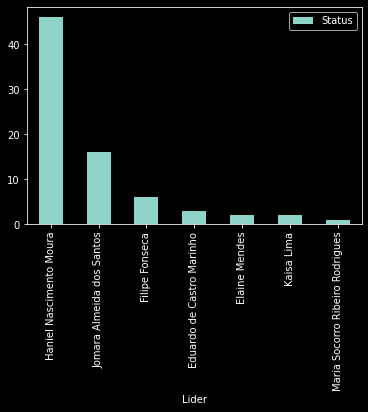

In [19]:
# Maior turno com abertura de chamados
df[df.Turno == '1º_Turno'].groupby(['Lider']).count().loc[:, ['Status']].sort_values('Status', ascending=False).plot.bar()